Checking out this potentially monumental (in my opinion) paper [KAN](https://arxiv.org/html/2404.19756v1). Few Notes and additions for future references :)

## KA Representation Theorem:

Was introduced to work on  Hilbert's 13th problem: It is necessary to prove whether a solution exists for all $7$th-degree equations using algebraic functions of two arguments.

Say we have a $7$th order polynomial as below:

$$x^7 + ax^3 + bx^2 + cx + 1 = 0\, \ldots (1)$$

Hilbert asked whether its solution, $x$, considered as a function of the three variables $a, b, c,$ can be expressed as the composition $(h = g \circ f,\rightarrow  h(x) = g(f(x)))$ of a finite number of two-variable functions.

The KA representation theorem states that for any continuous function $f\, :\, [0, 1]^d \rightarrow \mathbb{R}$, there exists univariate continuous functions $g_q, \, \psi _{p, q}$ such that

$$f(x_1, x_2, \ldots \, x_d) = f(x) = \sum \limits_{q=0}^{2d}\, g_q \left(\sum \limits _{p=1}^d\, \psi _{p, q}(x_p) \right)\, \ldots (2)$$

This means that the $(2d + 1)(d + 1)$ univariate functions $g_q$
and $ψ_{p,q}$ are enough for an exact representation of a $d$-variate
function. _The underlying point here is that the only truly multivariate function is addition since every other function can be written using univariate functions and sum_.

We bear in mind that $\psi _{p, q},\, g_q$ both are univariate functions. So, any continuous function of several variables can be expressed as the composition of univariate functions. Wow! I didn't know that. 😯 😯

--------------------------------------------------------------------------------

### Thinking About KA Theorem  🤔 🤔

The authors in the paper state that these 1D functions (defined before) can be non-smooth and even fractal, so they may not be learnable in practice. To build KANs the authors go beyond the definition of the KA representation theorem;  The original representation theorem can be thought of as depth 2 with each layer having $(2d+1)$ terms. We will comeback to this soon.

The MLPs (conventional neural networks in general) are based on the universal approximation theorem which states that any continuous function $f : [0, 1]^d → [0, 1]$ can be approximated arbitrarily well by a neural network (weights, biases and non-linear activation function) with at least $1$ hidden layer with a finite number of weights. During backpropagation, network learns to optimize the weights and biases to act as a function approximator while the activation functions remain fixed.

Now, can we build a neural-net architecture based on the KA representation theorem discussed above?   

Let's take a look of the shallow architecture of KAN from the paper itself

![KAN-MLP](https://raw.githubusercontent.com/suvoooo/Machine_Learning/master/KAN-Intro/KAN-MLP.png)

If we think about a supervised learning problem where given $\{x_i, y_i\}$ pair we want to find a function such that $y_i \approx f(x_i)$, then KA representation theorem tells me is that all I need to find are the univariate functions in Eq. 2 $(g_q, \, \psi _{p, q})$.

The authors here argue that as we need to learn only univariate functions, we can parametrize each 1D function as a B-spline curve (check below), with learnable coefficients of local B-spline basis functions. This leads to the prototype KAN and illustrated in the figure above (Model(shallow) (b)), with input dimensions $n=2$ appearing as a two-layer neural network with activation functions placed on edges instead of nodes (simple summation is performed on nodes), and with width $2n+1$ in the middle layer. The construction of the network i.e. number of activations, nodes, etc will be clear soon.

--------------------------------------------------------------------------------

**B-splines:** We can think that a B-spline function is a combination of flexible bands that is controlled by a number of points (control points), creating smooth curves. A bit more mathematical definition would be a B-spline of order $p+1$ is a collection of piecewise polynomial functions $B_{i, p}$ of degree $p$ in a variable $t$. The values of $t$ where the pieces of polynomial meet are known as knots.  

B-splines are built from piecewise polynomials (basis functions) and the order of a B-spline is one more than the degree of its basis polynomials. For example, a quadratic B-spline has polynomials of degree 2 and is of order 3.


--------------------------------------------------------------------------------

## Constructing KAN Layer: 🚧 🏗  👷

It was already mentioned that the 2 layer network representing the original KA representation theorem is too simple to approximate any function arbitrarily well. How to make the KAN wider and deeper?

Here the authors present an excellent analogy between KAN and MLPs to go deeper. First we need to see what is a KAN layer and how to stack them on top of each other to build a deep neural net.

First of all one can express the KA representation in matrix form as

$$f(x) = \psi _{\text{out}} \circ \psi _{\text{in}} \circ x\, \ldots \, (3)$$

A KAN layer with $n_{\text{in}}$-dimensional inputs and $n_{\text{out}}$dimensional outputs can be defined as a matrix of 1D functions

$$\Psi = \{\psi _{q, p}\}; \, p=1, 2, \ldots n_{\text{in}}, \, q = 1, 2, \ldots n_{\text{out}}\, \ldots \, (4)$$

In the Kolmogov-Arnold theorem (Eq. 2), the inner functions form a KAN layer with $n_{\text{in}} = n$ and $n_{\text{out}} = 2n+ 1$, and the outer functions
form a KAN layer with $n_{\text{in}} = 2n + 1$ and $n_{\text{out}} = 1$. At this stage we can clearly see that the KA representation can be thought of as a composition of two KAN layers. Let's try to get accustomed with the notations when we stack more KAN layers.


Let's see via an example that the authors presented in the paper, below is the network graph:

![KAN-graph](https://github.com/suvoooo/Machine_Learning/blob/master/KAN-Intro/KAN-Detailed.png)



We denote $n_i$ as the number of nodes in the $i$th layer of the KAN and the $i$th neuron in $l$th layer would be denoted by $(l, i)$ where the activation of this neuron is given by $x_{l, i}$. We think of the activation functions as learnable functions residing on the edges of the network graph and the nodes represent the summation operation. So between 1st (0th) and the 2nd layer (1st) we see there are 10 activation functions denoted by $\phi _{0, 1, 1}, \, \phi _{0, 1, 2}, \ldots$. These number of activation functions are governed by the number of nodes in 0th and 1st layer.

In the 0th layer we have two nodes $x_{0, 1}, \, x_{0, 2}$ and in the first layer we have 5, so the number of activation functions would be $n_l \times n_{l+1}$.

The $n_l$ and $n_{l+1}$ are determined from the input and output dimensions of the inner function defined in Eq. 4. So we started with two inputs $n_{\text{in}}=2$, so our $n_{\text{out}}$ has to be $2n+1 = 5$. This in turn determines the number of activation functions in the hidden layer.

If we continue with the number of nodes is $n_1 = 5$ and $n_2 = 1 (n_{\text{out}})$, it makes sense that number of activation at that layer is 5. This would be the outer function. So to repeat, **the KA representation is composed of two KAN layers**.

--------------------------------------------------------------------------------

### Matrix Form of KAN Layer

We can write this in matrix form. Let's see: The activation function that connects the two nodes at layers $l, l+1$ is denoted by $\phi_{l, j, i}$ where $j, i$ represents the $i, j$th neurons in those layers respectively.

So learnable activation function between layer $l, l+1$:

$$\phi_{l, j, i}; l=0, 1, \ldots L-1, i=1, 2, \ldots n_l, j=1, 2, \ldots n_{l+1}\, \ldots \, (5)$$

We can just check again that given that picture

$$n_0=2\, (n_{\text{in}}), n_1=5\, (2\times n_0 + 1), n_2 = 1 \, (n_{\text{out}})\, \ldots \, (5)$$

With these in mind, let's denote the input pre-activation of $ϕ_{l,j,i}$ as $x_{l,i}$; Then post-activation we will have

$$\tilde{x}_{l, j, i} \equiv ϕ_{l,j,i}(x_{l,i})$$

The activation value of the $(l + 1, j)$ neuron is simply the sum of all incoming postactivations.


With this we can define the learnable transformation matrix as

$$\Phi = \begin{bmatrix}\phi _{1, 1} (\cdot) & \phi _{1, 2} (\cdot)\,  \dots & \phi _{1, n_{l}}(\cdot) \\ \phi _{2, 1} (\cdot) & \phi _{2, 2} (\cdot)  \dots & \phi _{2, n_{l}} \\ \vdots & \ddots & \vdots \\ \phi _{n_{l+1}, 1} & \dots & \phi _{n_{l+1}, n_l}\end{bmatrix}\, \ldots \, (6)$$

Using this we can also write the transformation rule:

$$\mathbb{x}_{l+1} = \Phi (\mathbb{x}_{l}) = \begin{bmatrix}\phi _{1, 1} (\cdot) & \phi _{1, 2} (\cdot)\,  \dots & \phi _{1, n_{l}}(\cdot) \\ \phi _{2, 1} (\cdot) & \phi _{2, 2} (\cdot)  \dots & \phi _{2, n_{l}} \\ \vdots & \ddots & \vdots \\ \phi _{n_{l+1}, 1} & \dots & \phi _{n_{l+1}, n_l}\end{bmatrix}\, \mathbb{x}_l\, \ldots \, (7)$$


We can always check our understanding once again so

$$l=0; \rightarrow \mathbb{x_0} = [x_{0, 1}, \, x_{0, 2}]\rightarrow \mathbb{x}_{1\times 2}; n_0 \, (n_l) = 2, n_1 \, (n_{l+1}) = 5;  \\ \Phi _{n_{l+1} \times n_{l}} \rightarrow \Phi _{5 \times 2}\rightarrow \Phi _{5 \times 2} \times \mathbb{x}^T_{2 \times 1} \equiv \mathbb{x}_{5\times 1}\, \ldots \, (8)$$

Indeed we have 5 outputs $x_{1, 1}\, x_{1, 2}\, x_{1, 3}\, x_{1, 4}\, x_{1, 5}\,$.

Once we have the transformation matrix ready we can simply compose (stack layers) them to go deeper as below:

$$\text{KAN}(\mathbb{x}) = \left(\Phi _{L-1} \circ \Phi _{L-2} \circ \dots \Phi _{1} \circ \Phi _0\right)(\mathbb{x}) \, \ldots \, (9)$$

At this point we can also appreciate that all the operations are differentiable (assuming the 1D functions also are) gradients can flow through the network i.e. we can do the backpropagation.

One can also make comparison with the MLP layer where we have weight matrices (linear transformation) and activation function (non-linearity) separated

$$\text{MLP}(\mathbb{x}) = \left(W _{L-1} \circ \sigma \circ W _{L-2} \circ \sigma \circ \dots  \circ W _0\right)(\mathbb{x}) \, \ldots \, (10)$$

The values in the weight matrices get updated but the activation function once defined is fixed. This is the pivotal difference between a KAN and an MLP layer.  


Since for KAN now everything boils down to the activation functions, the authors define how to construct these functions.

--------------------------------------------------------------------------------


### Learnable Activations: 🧑 🖊 💻

For constructing the activation function $\phi (x)$, the authors propose to have a basis function $(b(\cdot))$ and spline function and combine them as below:

$$\phi (x) = w\left(b(x) + \text{spline}(x)\right)\, \ldots \, (11)$$

The authors take the basis function as SiLU

$$b(x) = x \times \sigma (x) = \frac{x}{1+e^{-x}}\, \ldots \, (12)$$

For the spline function it is a linear superposition of B-splines

$$\text{spline} (x) = \sum _i \, c_i \, B_i(x)\, \ldots \, (13)$$

If we look back at the second figure we see that it is a linear combination of B-splines with $k=3$, i.e the order is 3, so the degree of the polynomials in the B-spline is 2. One advantage of defining a spline like this is the possibility of making it arbitrarily smooth by having more curves. This is shown also in Fig. 2 where we the authors have increased the number of intervals where we join different polynomials from 7 to 12.

The weighting of the B-splines i.e. $c_i$'s are trainable and the authors argue that the only usage of the factor $w$ in Eq. 11 is to have better control of the overall magnitude of the activation function.   

Here also the authors discuss that in general KAN is slower than MLP. So to understand this we can simply caluclate the number of parameters by assuming a network of depth $L$ with every layer having equal number of nodes $n_i = N$ with each spline of order $k$ (usually k = 3) on G intervals; This would be

$$\text{KAN}: \mathcal{O}(N^2 (L(G+k)) \approx \mathcal{O}\left(N^2 \, LG \right); \, \, \text{MLP}: \mathcal{O}(N^2 L)$$

However, KANs require much less depth i.e. $N$ than in MLPs.  


There are just so many intricate details still left in this paper but one thing that stands out personally for me is the interpretability of KANs. The authors show that KANs can "discover" simple division laws to non-trivial relations in knot theory. This could lead to further applications of KANs in foundational model for AI & Science in general.

This also makes KANs more 'attractive' than symbolic regression; The authors gave an example of learning the very wiggly Bessel Function of order 20 $\left(J_{20}(x)\right)$ via KAN which is impossible through symbolic regression without any prior knowledge of that special function (in this case Bessel function) itself.




Out of the many examples the authors presented, I liked the relatively easy but fascinating 'auto discoverable' property of KAN. Say we start with relativistic addition of velocity formula;

$$f(v_1, v_2) = \frac{v_1 + v_2}{1 + v_1\, v_2}$$

The way one can think about the depth of KAN is to consider every layer of KAN discovering one mathematical operation; So by looking at the formula above, first we think about multiplication;
we need two layers for multiplication as the authors show that learned activation functions would be linear and quadratic, so:
$$2xy = \left(x+y\right)^2 - \left(x^2 + y^2\right)$$

Inverting of $1 + v_1\, v_2$ would use one layer, and multiplication of $v_1 + v_2$ with $\frac{1}{1 + v_1\ v_2}$ would require another 2 layers; In total 5.  

But the researchers found that auto discovered KANs are only 2 layers deep and this on hindsight could be explained via rapidity trick.

In relativity we can simplify the transformation rules via the rapidity trick; One can define rapidity as:

$$\phi_1 = \text{arctanh}\, v_1, \, \phi_2 = \text{arctanh}\, v_2  $$

Sorry we physicists always take natural units $\bar{h}=c = 1$.

Since
$$\tanh (a+b) = \frac{\tanh a + \tanh b}{1 + \tanh a \, \tanh b}$$

we can clearly see that

$$f(v_1, v_2) = \tanh (\phi _1 + \phi _2)$$

So the relativistic addition of velocity is indeed simple addition and the final application of `tanh` function; So we need two layers!

Can we use KAN like these to discover/rediscover some fundamental physics laws? ❣ ❣ ❣ ❣


## Let's Check Some Variations of Example from [KAN Repository](https://github.com/KindXiaoming/pykan/tree/master/tutorials)

In [ ]:
!pip install pykan

In [ ]:
from kan import KAN, create_dataset

import torch
#device = torch.device("cuda")

In [ ]:

f = lambda x: (x[:,[0]]+x[:,[1]])/(1+x[:,[0]]*x[:,[1]]) # dataset creation where x[:, [0]] represents v1, x[:, [1]]: v2

# dataset = create_dataset(f, n_var=2, ranges=[-0.9,0.9])

# print ('check dataset type: ', type(dataset), 'check keys: ', dataset.keys())

In [ ]:
print (dataset['train_input'])
train_input_arr = dataset['train_input'].numpy()
print (train_input_arr.shape)
train_label_arr = dataset['train_label'].numpy()
print (train_label_arr.shape)

tensor([[-0.0067,  0.4992],
        [ 0.4828,  0.1612],
        [-0.7407,  0.1374],
        ...,
        [-0.2895, -0.4111],
        [ 0.0032, -0.3570],
        [-0.1730, -0.7539]])
(1000, 2)
(1000, 1)


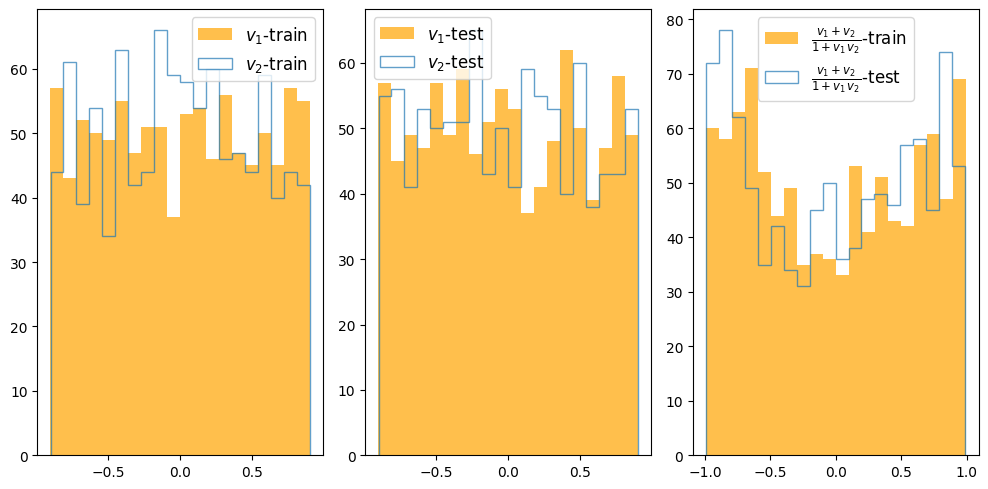

In [ ]:
import matplotlib.pyplot as plt

### check train and test input distribution

fig = plt.figure(figsize=(10, 5))
fig.add_subplot(131)
plt.hist(dataset['train_input'][:, 0], bins=20, alpha=0.7, label=r'$v_1$-train', color='orange')
plt.hist(dataset['train_input'][:, 1], bins=20, alpha=0.7, label=r'$v_2$-train', histtype='step')
plt.legend(fontsize=12)
fig.add_subplot(132)
plt.hist(dataset['test_input'][:, 0], bins=20, alpha=0.7, label=r'$v_1$-test', color='orange')
plt.hist(dataset['test_input'][:, 1], bins=20, alpha=0.7, label=r'$v_2$-test', histtype='step')
plt.legend(fontsize=12)
fig.add_subplot(133)
plt.hist(dataset['train_label'].numpy(), bins=20, alpha=0.7, label=r'$\frac{v_1+v_2}{1+v_1\, v_2}$-train', color='orange')
plt.hist(dataset['test_label'].numpy(), bins=20, alpha=0.7, label=r'$\frac{v_1+v_2}{1+v_1\, v_2}$-test', histtype='step')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Explicit Checks for Available Devices and Set to Cuda

No need to run these cells


Check below to find the cells to run

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    if isinstance(data, dict):
        return {k: to_device(v, device) for k, v in data.items()}
    return data.to(device, non_blocking=True)

# Select the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print ('check available device: ', device)

# Move the entire dataset to the GPU
dataset = to_device(dataset, device)

In [ ]:
model = KAN(width=[2, 1, 1], grid=10, k=3)
model = model.to(device)

In [ ]:
def check_device(model, dataset):
    # Check the model's device
    print("Model is on:", next(model.parameters()).device)

    # Check the dataset's device
    for name, tensor in dataset.items():
        print(f"{name} is on {tensor.device}")

# Usage
check_device(model, dataset)

Model is on: cuda:0
train_input is on cuda:0
test_input is on cuda:0
train_label is on cuda:0
test_label is on cuda:0


### Run from here

In [ ]:
### let's try this explicitly anyway

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = KAN(width=[2, 1, 1], grid=10, k=3, seed=0, device=device)
dataset = create_dataset(f, n_var=2,device=device)


train loss: 1.48e-02 | test loss: 1.58e-02 | reg: 2.78e+00 : 100%|██| 25/25 [00:08<00:00,  2.86it/s]


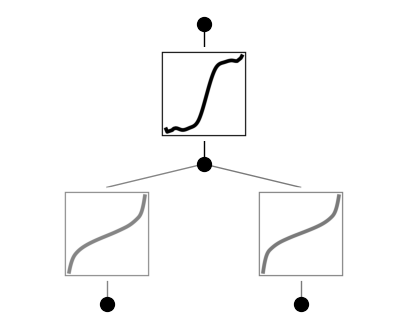

In [ ]:
model.train(dataset, opt="LBFGS", steps=25, device=device)

model.plot(beta=10)

the idea here is that we see both the input ('activation') functions look the same; so we can lock them together and retrain the model again

In [ ]:
model.lock(0,[[0,0],[1,0]])
#model.plot(beta=10)

In [ ]:
model.train(dataset, opt="LBFGS", steps=25, device=device);

train loss: 1.40e-02 | test loss: 1.84e-02 | reg: 2.76e+00 : 100%|██| 25/25 [00:08<00:00,  2.81it/s]


the loss kinda remains the same; and now we can ask KAN for suggestion, what kinda function this could be:

In [ ]:
model.suggest_symbolic(0, 1, 0)

function , r2
arctanh , 0.9986623525619507
tan , 0.9961022138595581
arcsin , 0.968244731426239
x^3 , 0.9537016749382019
sqrt , 0.9368619918823242


('arctanh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9986623525619507)

This is really cool that the activation on the first layer were automatically suggested as `arctanh` ! We want to retrain now the model with this as our prior knowledge.

Sadly this step turned out to be notoriously difficult as suggested in this [GitHub issue](https://github.com/KindXiaoming/pykan/issues/89) since optimization with complex symbolic function like $\text{tanh}^{-1}$ that goes to infinity are problematic.   

Let's see if KAN recognizes the activation function at the second layer or not

In [ ]:
# model.fix_symbolic(0,0,0,'arctanh')
# model.fix_symbolic(0,1,0,'arctanh')

#model.train(dataset, opt="Adam", steps=100, update_grid=False, device=device);


train loss: 6.80e-01 | test loss: 6.86e-01 | reg: 3.20e+00 : 100%|█| 100/100 [00:02<00:00, 44.50it/s


In [ ]:
model.suggest_symbolic(1, 0, 0) # suggest the function at the final layer; expectation tanh


function , r2
tanh , 0.9995558857917786
arctan , 0.995667040348053
gaussian , 0.9793974757194519
sin , 0.9784255027770996
sigmoid , 0.9764178991317749


('tanh',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9995558857917786)

That's fantastic! Now we can retrain the model with this activation function in the final layer;

`tanh` is well behaved compared to `arctanh` so here we can get a better loss by fixing the activation to this symbolic formula; Let's see

In [ ]:
model.fix_symbolic(1,0,0,'tanh')

model.train(dataset, opt="LBFGS", steps=25, device=device);



r2 is 0.9995558857917786


train loss: 1.07e-02 | test loss: 8.61e-03 | reg: 2.77e+00 : 100%|██| 25/25 [00:06<00:00,  4.03it/s]


In [ ]:
###let's view the discovered formula

model.fix_symbolic(0,0,0,'arctanh')
model.fix_symbolic(0,1,0,'arctanh')
model.symbolic_formula()[0][0]

r2 is 0.9991527199745178
r2 is 0.998881459236145


1.0*tanh(1.03*atanh(0.99*x_1) + 1.03*atanh(0.99*x_2))

Pretty Damn cool!


#### To Try:

1. Pruning (From deep to shallow)

2. Discovering Phase Transition